# はじめてのパターン認識２章

## 識別規則

識別規則とは入力データ$x$からクラス$C_i\in\Omega=\{C_1,\ldots,C_K\}$への写像

- 事後確率による方法。ベイズ最大事後確率法
- 距離による方法、最近傍法kNN
- 関数値による方法、パーセプトロン、SVM
- 決定木

## 汎化能力

真の誤り率$\epsilon(p,p)$とは真の分布$p$に従う学習データを用いて識別規則を作り、真の分布に従うテストデータによりテストした誤り率。

再代入誤り率$\epsilon(p_L,p_L)$とは、サンプルの分布$p_L$を学習データとし、テストにも同じデータを用いて測定した誤り率。

### ホールドアウト法

データセットを分割し一方を$p_L$としもう一方を$p_T$とする。ホールドアウト誤り率$\epsilon(p_L,p_T)$とおいう。これについて
$$
E_{D_L}(\epsilon(p_L,p_L))\leq\epsilon(p,p)\leq E_{D_T}(\epsilon(p_L,p_T))
$$
となる。

In [38]:
# ホールドアウト法の実験
# train/testの割合を変えるとどうなるか？

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

N = 100
errs = list()

for i in range(N):
    X = np.concatenate((np.random.normal(loc = 0, scale = 1, size = 100),
                        np.random.normal(loc = 2, scale = 1, size = 100)))
    y = np.concatenate((np.zeros(100), np.ones(100)))

    clf = LogisticRegression(solver = 'lbfgs').fit(X.reshape((-1,1)), y)
    errs.append(1 - clf.score(X.reshape((-1,1)), y))


X = np.concatenate((np.random.normal(loc = 0, scale = 1, size = 100),
                    np.random.normal(loc = 2, scale = 1, size = 100)))
y = np.concatenate((np.zeros(100), np.ones(100)))
N = 100
errsh = list()

for i in range(N):
    clf = LogisticRegression(solver = 'lbfgs').fit(X.reshape((-1,1)), y)
    errs.append(1 - clf.score(X.reshape((-1,1)), y))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    clf = LogisticRegression(solver = 'lbfgs').fit(X_train.reshape((-1,1)), y_train)
    errsh.append(1 - clf.score(X_test.reshape((-1,1)), y_test))

print(sum(errs) / N)
print(sum(errsh) / N)

#データセットは固定するか？それもとりなおすか？

0.28489999999999993
0.12959999999999988


### 交差確認法（Closs Validation）

In [2]:
# 分割数kに応じてどう変わるか調べる

# データセットは上と同様に作り、ロジスティックで分類する
# 分割数ごとに、訓練誤差の平均と分散をプロットしてみる

### 一つ抜き交差確認（LOOCV）

### ブートストラップ法

In [ ]:
# ブートストラップサンプルによる真の誤り率の推定

## バイアスバリアンス分解

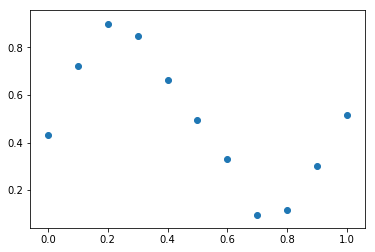

In [25]:
# テキストにある多項式回帰のバイアスとバリアンス
# 例題2.3
# 各次数ごとにバイアス項とバリアンス項の平均をサンプリングして計算せよ（例題2.3を参考に）

import matplotlib.pyplot as plt

x = np.linspace(0,1,11)
noize = np.random.normal(loc = 0, scale = 0.05, size = 11)
y = 0.5 + 0.4 * np.sin(2 * np.pi * x) + noize

plt.scatter(x, y)
plt.show()